# Predicting Customer Churn Rate for Telecom Sector
This file contains Data preprocessing, Logistic Regression and Random Forest for the selected dataset.

**1. Reading Data File**

In [3]:
#Installing & loading required packages
install.packages('tidyverse')
install.packages('dplyr')
library(tidyverse)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
tc_id <- "1_G9Sbf0dpX-hO5wSe75hxtq1lNJ66UqN"
tc_data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", tc_id))

In [5]:
summary(tc_data)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55.00                                        
                    Max.   :72.

In [6]:
glimpse(tc_data)

Rows: 7,043
Columns: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW…
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Female",…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes…
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No"…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", …
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service", "…
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber opt…
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "…
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "N…
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Y…
$ TechSupport   

**2. Data Pre-Processing**

In [7]:
#Finding number of empty cells
tc_data %>%
  summarise_all(~sum(is.na(.)))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
#Remove Duplicates & unnecessary data (Data Cleaning)
library(stringr)

process_data <- function(raw_data) {
  cleaned_data <- raw_data %>%
    mutate(
      # Clean and convert TotalCharges and MonthlyCharges to numeric
      TotalCharges = as.numeric(str_replace_all(TotalCharges, "[^0-9.]", "")),
      MonthlyCharges = as.numeric(str_replace_all(MonthlyCharges, "[^0-9.]", "")),
      Churn = ifelse(Churn == "Yes" | Churn == 1, 1, 0)
    ) %>%
    # Round off the values for TotalCharges and MonthlyCharges
    mutate(
      TotalCharges = round(TotalCharges, 0),
      MonthlyCharges = round(MonthlyCharges, 0)
    )

  return(cleaned_data)
}


In [9]:
tc_cleaned <- process_data(tc_data)

glimpse(tc_cleaned)

Rows: 7,043
Columns: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW…
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Female",…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes…
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No"…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", …
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service", "…
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber opt…
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "…
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "N…
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Y…
$ TechSupport   

# Logistic Regression

In [10]:
#Using R with the glm function (generalized linear model) for logistic regression - "Churn"(dependent Variable) and "TotalCharges", "MonthlyCharges"(independent variables)
logistic_model <- glm(Churn ~ TotalCharges + MonthlyCharges , data = tc_cleaned, family = binomial)

# Print a summary of the logistic regression model
summary(logistic_model)


Call:
glm(formula = Churn ~ TotalCharges + MonthlyCharges, family = binomial, 
    data = tc_cleaned)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.803e+00  8.868e-02  -31.61   <2e-16 ***
TotalCharges   -6.173e-04  1.969e-05  -31.36   <2e-16 ***
MonthlyCharges  4.523e-02  1.430e-03   31.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8150.1  on 7042  degrees of freedom
Residual deviance: 6575.6  on 7040  degrees of freedom
AIC: 6581.6

Number of Fisher Scoring iterations: 4


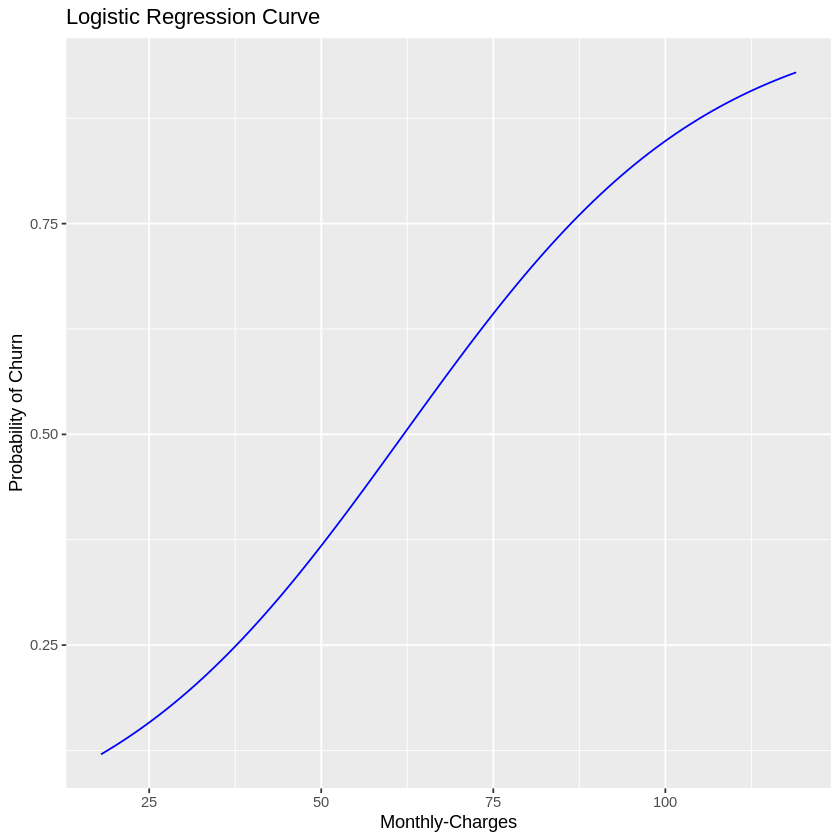

In [16]:
# Extract coefficients
coefficients <- coef(logistic_model)

# Handle missing or infinite values in TotalCharges
monthly_charges_values <- seq(min(tc_cleaned$MonthlyCharges, na.rm = TRUE),
                             max(tc_cleaned$MonthlyCharges, na.rm = TRUE),
                             length.out = 100)

# Calculate predicted log-odds
log_oddss <- coefficients[1] + coefficients["MonthlyCharges"] * monthly_charges_values

# Convert log-odds to probabilities
probabilities <- 1 / (1 + exp(-log_oddss))

plot_data <- data.frame(MonthlyCharges = monthly_charges_values, Probability = probabilities)

# Plot the logistic regression curve
ggplot(plot_data, aes(x = MonthlyCharges, y = Probability)) +
  geom_line(color = "blue") +
  labs(title = "Logistic Regression Curve", x = "Monthly-Charges", y = "Probability of Churn")

# Random Forest

In [12]:
# Install and load the randomForest package
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [13]:
rf_data <- tc_data

# Convert "Customer_Status" to a factor with two levels rather than a numeric value
rf_data$Churn <- as.factor(rf_data$Churn)

# Split the data into training and testing sets
set.seed(123)  # for reproducibility
train_indices <- sample(1:nrow(rf_data), 0.7 * nrow(rf_data))
train_data <- rf_data[train_indices, ]
test_data <- rf_data[-train_indices, ]


In [14]:
# Build the Random Forest model
rf_model <- randomForest(Churn ~ ., data = train_data, ntree = 500)

# Make predictions on the test set
predictions <- predict(rf_model, test_data)

# Evaluate the model (e.g., accuracy)
conf_matrix <- table(predictions, test_data$Churn)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.808329389493611"


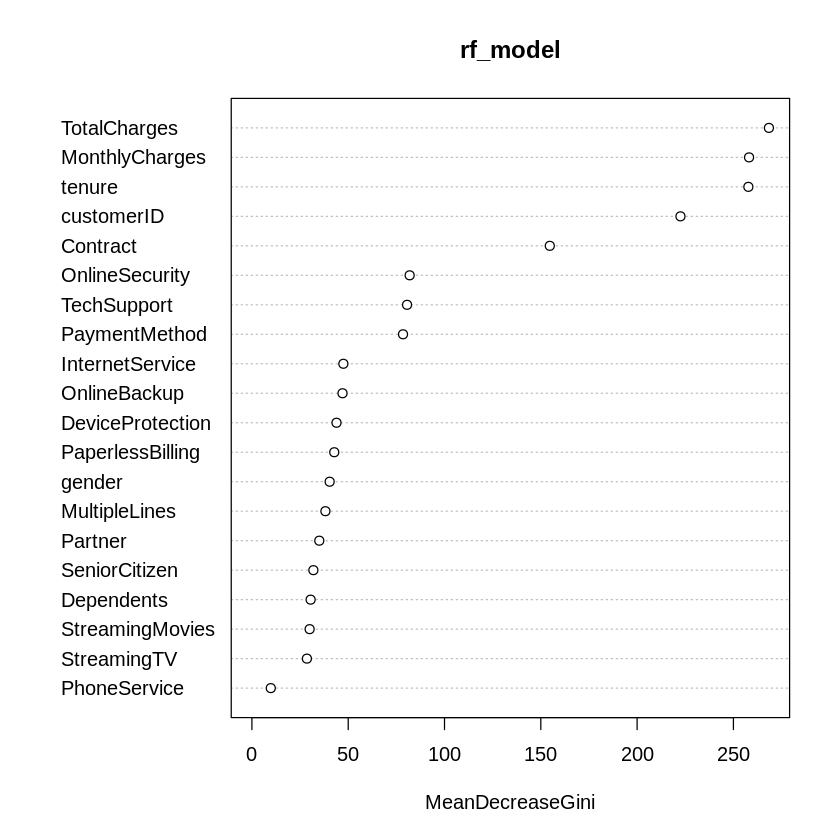

In [15]:
# Display feature importance
varImpPlot(rf_model)